In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats
import pickle

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (12,7.5)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

## Lab 5a. 
Download the training datasets from one of the two pT-range folders. In each folder, there are 2 files, each containing 100k jets. The signal dataset is labeled as “higgs” and the background dataset is labeled as “qcd.”

In [3]:
# import LHC data set 2:
higgs_file_in = open('higgs_100000_pt_1000_1200.pkl', 'rb')
higgs_data = pickle.load(higgs_file_in) # pandas DataFrame
print(type(higgs_data))
keys = higgs_data.keys()
print(keys)
qcd_file_in = open('qcd_100000_pt_1000_1200.pkl', 'rb')
qcd_data = pickle.load(qcd_file_in) # pandas DataFrame

<class 'pandas.core.frame.DataFrame'>
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


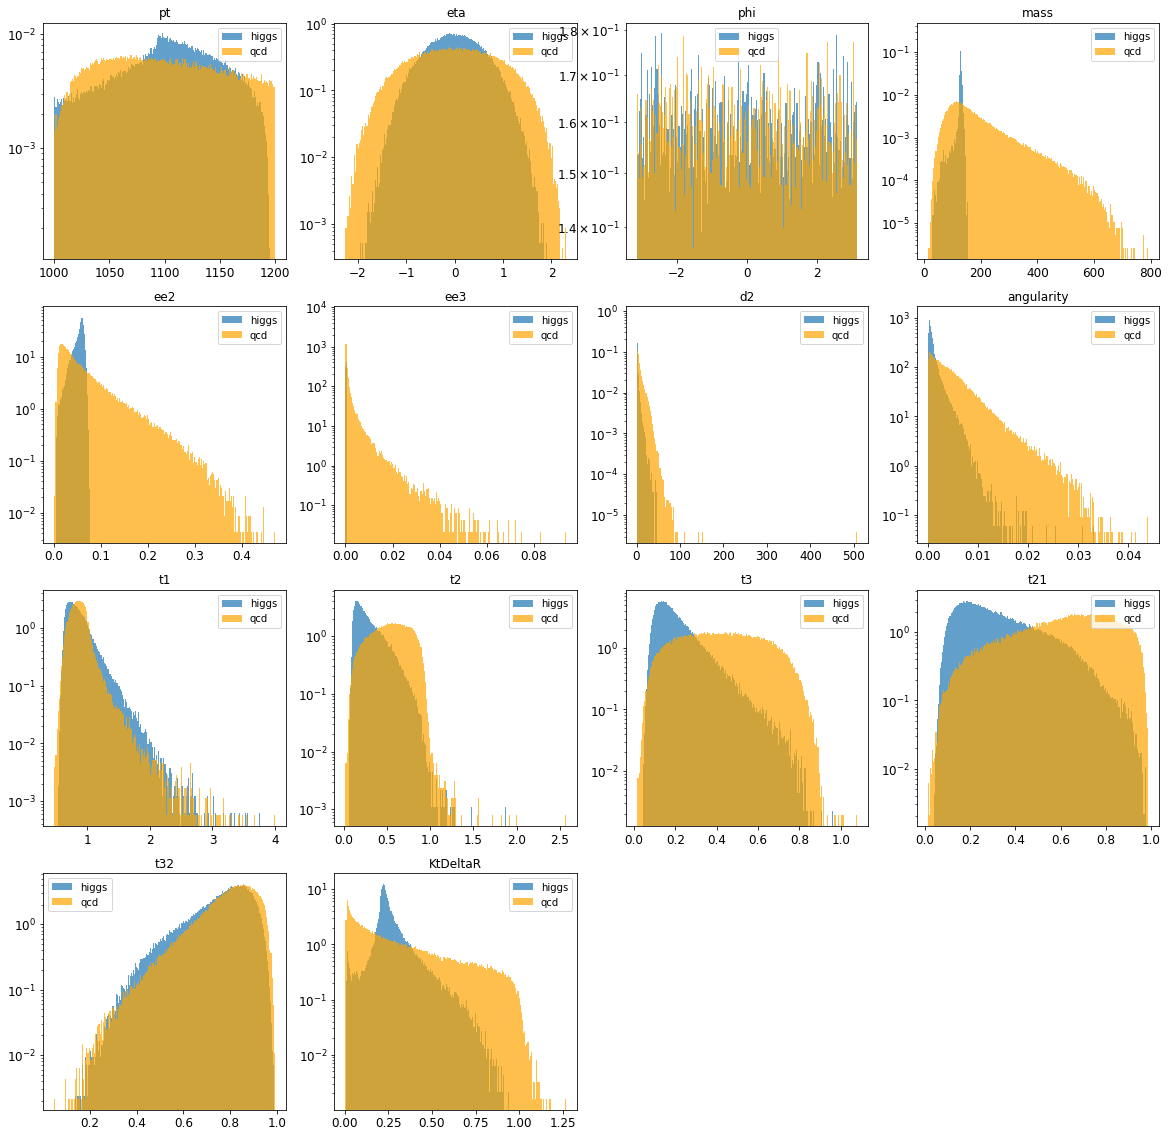

In [4]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

i = 0
for key in keys:
    ax[int(i/4)][i%4].hist(higgs_data[key], bins=200, label='higgs', alpha=0.7, density=True)
    ax[int(i/4)][i%4].hist(qcd_data[key], bins=200, color='orange', label='qcd', alpha=0.7, density=True)
    ax[int(i/4)][i%4].legend()
    ax[int(i/4)][i%4].set_title(key)
    ax[int(i/4)][i%4].set_yscale('log')
    i = i + 1
fig.delaxes(ax[3][2])
fig.delaxes(ax[3][3])

## Lab 5b. Explore the training data by addressing the following:

#### 1. Do all of the features provide discrimination power between signal and background?
Most of the features do provide discriminatino power between signal and background; as long as the distributions of the signal and the background do not closely match, we will be able to the extract useful information from that feature.
#### 2. Are there correlations among these features?
Yes, there do appear to be some correlations among these features since some of these distributions for these features do share similar patterns.
#### 3. Compute the expected discovery sensitivity (significance of the expected signal) by normalizing each sample appropriately (see 'expected yields' below).
Expected Discovery Sensitivity = NHiggs/(√NQCD)

In [6]:
print('Expected Discovery Sensitivity = ' + str(50/2000**(0.5)))

Expected Discovery Sensitivity = 1.118033988749895


#### 4. Develop a plan to optimize the discovery sensitivity by applying selections to these features.
If we take overall expected value and calculate discovery sensitivity that way, it is likely that we'll get a pretty low sigma value for discovery. However, if we use a feature where the signal and the background have different distributions and we select a range of values where these two strongly overlap, we will be able to increase our discovery sensitivity.